# Dimentionalty Reduction

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig, svd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class DimensionalityReducer(object):
    
    def __init__(self, data, target_dimension):
       
        self.data=data
        self.target_dimension = target_dimension
        self.fit()
        
    def fit(self):
        raise NotImplementedError
    
    def transform(self, data_point):
        raise NotImplementedError
            
    def reconstruct(self, transformed_data_point):
        raise NotImplementedError
        

In [106]:
class PCADimensionalityReducer(DimensionalityReducer):
    
    def __init__(self,data,target_dimension):
        
        self.eigen_values = None 
        self.eigen_vectors = None
        
        super(PCADimensionalityReducer,self).__init__(data=data,target_dimension=target_dimension)
        
    def fit(self):
        self.eigen_values, self.eigen_vectors = eig(np.cov(self.data,rowvar=False))
        self.eigen_vectors = np.real(self.eigen_vectors)
        
        
    def transform(self, data_point):
        return np.dot(data_point, self.eigen_vectors[:,:self.target_dimension])
 
    def reconstruct(self, transformed_data_point):
        return np.dot(transformed_data_point, np.transpose(self.eigen_vectors[:,:self.target_dimension]))

In [107]:
dataset = datasets.fetch_olivetti_faces(shuffle=True)
faces = dataset.data

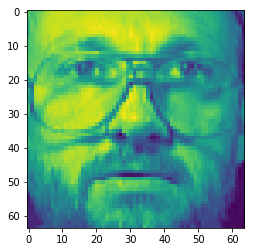

In [108]:
plt.imshow(faces[0].reshape((64,64))) 
plt.show()

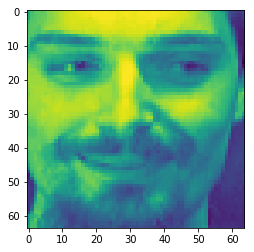

In [111]:
plt.imshow(faces[351].reshape((64,64))) 
plt.show()

In [110]:
target_dim = 200

dr_pca = PCADimensionalityReducer(data=faces[:350],target_dimension=target_dim)

In [95]:
mean = faces[351].mean()
transformed = dr_pca.transform(data_point=faces[351])
reconstructed_image_pca = dr_pca.reconstruct(transformed).reshape((64,64))

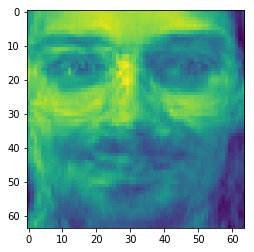

In [96]:
plt.imshow(reconstructed_image_pca) 
plt.show()

In [97]:
class SVDDimensionalityReducer(DimensionalityReducer):
    
    def __init__(self,data, target_dimension):
        
        self.s = None 
        self.v = None
        self.u = None

        super(SVDDimensionalityReducer,self).__init__(data=data,target_dimension=target_dimension)
    
    def fit(self):
        self.u, self.s, self.v = svd(self.data, full_matrices=False)
        
    def transform(self, data_point):

        s = np.diag(self.s[:self.target_dimension])
        v = self.v[:self.target_dimension]

        return np.dot(np.dot(data_point, v.T), np.linalg.inv(s))
    
    def reconstruct(self, transformed_data_point):

        s = np.diag(self.s[:self.target_dimension])
        v = self.v[:self.target_dimension]
        
        return np.dot(np.dot(transformed_data_point,s), v)
        

In [102]:
dr_svd = SVDDimensionalityReducer(data=faces[:350],target_dimension=200)

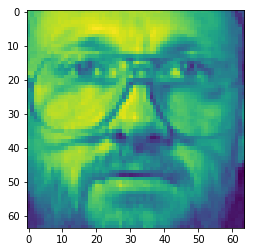

In [103]:
plt.imshow(dr_svd.reconstruct(dr_svd.transform(faces[0])).reshape(64,64));

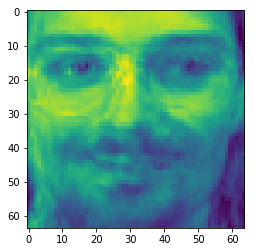

In [104]:
plt.imshow(dr_svd.reconstruct(dr_svd.transform(faces[351])).reshape(64,64));